# Exploratory and Explanatory Visualisations of Prosper Loans
## by Svajune Klimasauskaiste

## Preliminary Wrangling

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
This data dictionary explains the variables in the data set. You are not expected to explore all of the variables in the dataset! Focus your exploration on about 10-15 of them.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [107]:
df_raw=pd.read_csv('prosperLoanData.csv')
df_raw.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### What is the structure of your dataset?

In [108]:
df_raw.shape

(113937, 81)

### The main features of interest

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

In [109]:
df=pd.DataFrame(data=df_raw,columns=['Term','BorrowerRate', 'LoanStatus',
     'EmploymentStatusDuration','IsBorrowerHomeowner',
     'BankcardUtilization','DebtToIncomeRatio', 'ProsperRating (numeric)',
     'StatedMonthlyIncome', 'OpenCreditLines','LoanOriginationDate'])

In [110]:
df.shape

(113937, 11)

In [111]:
df.head()

,Term,BorrowerRate,LoanStatus,EmploymentStatusDuration,IsBorrowerHomeowner,BankcardUtilization,DebtToIncomeRatio,ProsperRating (numeric),StatedMonthlyIncome,OpenCreditLines,LoanOriginationDate
0,36,0.1580,Completed,2.0,True,0.00,0.17,NaN,3083.333333,4.0,2007-09-12 00:00:00
1,36,0.0920,Current,44.0,False,0.21,0.18,6.0,6125.000000,14.0,2014-03-03 00:00:00
2,36,0.2750,Completed,NaN,False,NaN,0.06,NaN,2083.333333,NaN,2007-01-17 00:00:00
3,36,0.0974,Current,113.0,True,0.04,0.15,6.0,2875.000000,5.0,2012-11-01 00:00:00
4,36,0.2085,Current,44.0,True,0.81,0.26,3.0,9583.333333,19.0,2013-09-20 00:00:00


### Clean Data

In [112]:
#Convertion to years instead of months
df['Term']=df['Term']/12
df['EmploymentStatusDuration']=df['EmploymentStatusDuration']/12

In [113]:
#Round Salary format
df['StatedMonthlyIncome']=round(df['StatedMonthlyIncome']);

In [114]:
# Fix Date format
df['LoanOriginationDate']=pd.to_datetime(df['LoanOriginationDate'])

In [116]:
#df['Year'] = df['LoanOriginationDate'].dt.year.astype('str')
#df.Year=df.Year.astype(int);
df['Year'] = df['LoanOriginationDate'].dt.year.astype(int)


In [117]:
df.describe()

,Term,BorrowerRate,EmploymentStatusDuration,BankcardUtilization,DebtToIncomeRatio,ProsperRating (numeric),StatedMonthlyIncome,OpenCreditLines,Year
count,113937.000000,113937.000000,106312.000000,106333.000000,105383.000000,84853.000000,1.139370e+05,106333.000000,113937.000000
mean,3.402521,0.192764,8.005965,0.561309,0.275947,4.072243,5.608028e+03,9.260164,2011.042611
std,0.869684,0.074818,7.873384,0.317918,0.551759,1.673227,7.478497e+03,5.022644,2.506634
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,2005.000000
25%,3.000000,0.134000,2.166667,0.310000,0.140000,3.000000,3.200000e+03,6.000000,2008.000000
50%,3.000000,0.184000,5.583333,0.600000,0.220000,4.000000,4.667000e+03,9.000000,2012.000000
75%,3.000000,0.250000,11.416667,0.840000,0.320000,5.000000,6.825000e+03,12.000000,2013.000000
max,5.000000,0.497500,62.916667,5.950000,10.010000,7.000000,1.750003e+06,54.000000,2014.000000


In [118]:
df.head()

,Term,BorrowerRate,LoanStatus,EmploymentStatusDuration,IsBorrowerHomeowner,BankcardUtilization,DebtToIncomeRatio,ProsperRating (numeric),StatedMonthlyIncome,OpenCreditLines,LoanOriginationDate,Year
0,3.0,0.1580,Completed,0.166667,True,0.00,0.17,NaN,3083.0,4.0,2007-09-12,2007
1,3.0,0.0920,Current,3.666667,False,0.21,0.18,6.0,6125.0,14.0,2014-03-03,2014
2,3.0,0.2750,Completed,NaN,False,NaN,0.06,NaN,2083.0,NaN,2007-01-17,2007
3,3.0,0.0974,Current,9.416667,True,0.04,0.15,6.0,2875.0,5.0,2012-11-01,2012
4,3.0,0.2085,Current,3.666667,True,0.81,0.26,3.0,9583.0,19.0,2013-09-20,2013


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

In [119]:
base_color=sb.color_palette()[0]

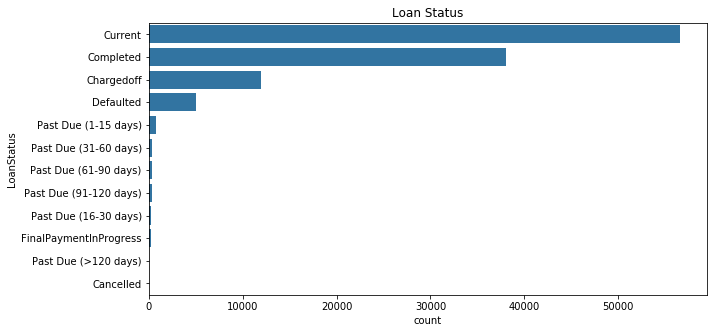

In [120]:
plt.figure(figsize = [10, 5]) 
loan_order=df['LoanStatus'].value_counts().index
sb.countplot(data=df, y='LoanStatus', color=base_color, order=loan_order)
plt.title('Loan Status');

In [121]:
#df=df.query('LoanStatus!="Defaulted"' and 'LoanStatus!="Chargedoff"' and 'LoanStatus!="Completed"'and 'LoanStatus!="Cancelled"')
#df=pd.DataFrame(df)


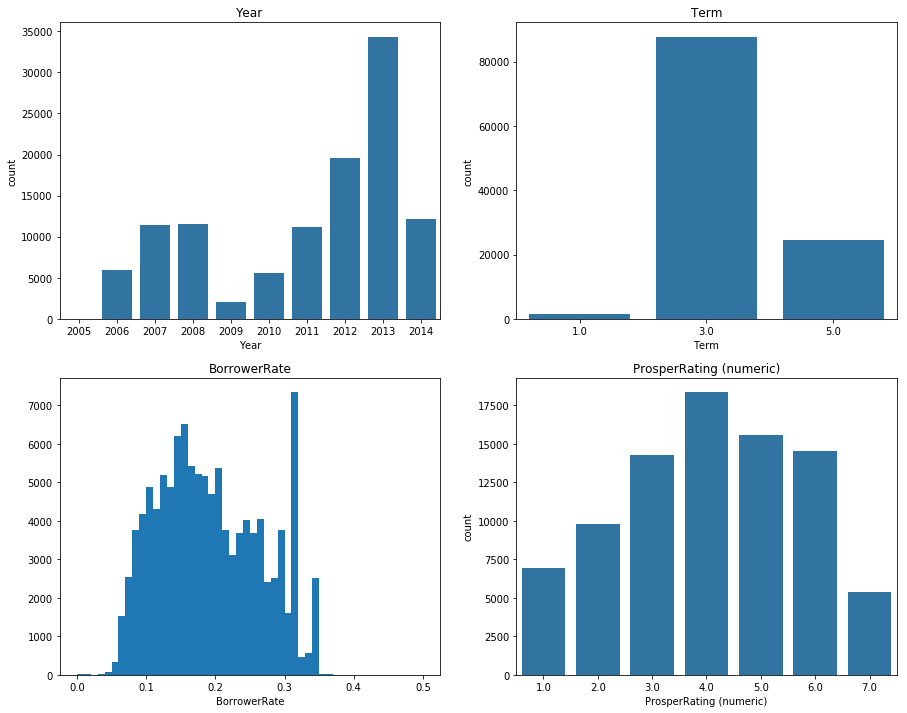

In [122]:
plt.figure(figsize = [15, 12]) 

plt.subplot(2, 2, 1) 
#bin_edges = np.arange(0, df['Year'].max()+1, 1)
sb.countplot(data=df, x='Year',color=base_color);
plt.title('Year')
plt.xlabel('Year');

plt.subplot(2, 2, 2) 
sb.countplot(data=df, x='Term', color=base_color)
plt.title('Term')
plt.xlabel('Term')

plt.subplot(2, 2, 3) 
bin_edges = np.arange(0, df['BorrowerRate'].max()+0.01, 0.01)
plt.hist(data=df, x='BorrowerRate', bins=bin_edges)
plt.title('BorrowerRate')
plt.xlabel('BorrowerRate');

plt.subplot(2, 2, 4) 
sb.countplot(data=df, x='ProsperRating (numeric)',color=base_color)
plt.title('ProsperRating (numeric)')
plt.xlabel('ProsperRating (numeric)');


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

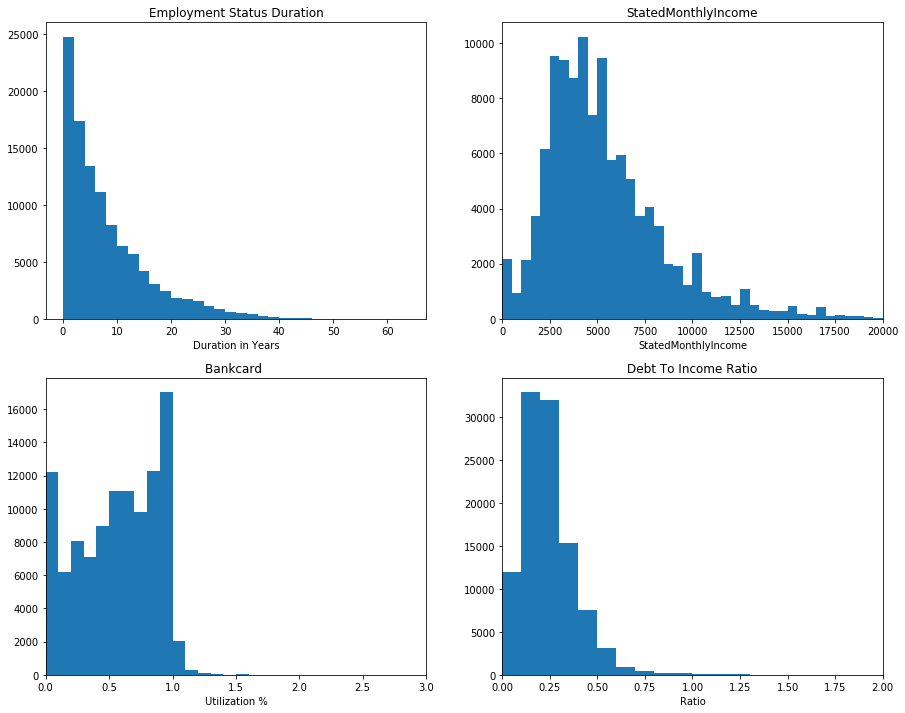

In [123]:
plt.figure(figsize = [15, 12]) 

plt.subplot(2, 2, 1) 
bin_edges = np.arange(0, df['EmploymentStatusDuration'].max()+2, 2)
plt.hist(data=df, x='EmploymentStatusDuration',bins=bin_edges);
plt.title('Employment Status Duration')
plt.xlabel('Duration in Years');

plt.subplot(2, 2, 2)
bin_edges = np.arange(0, df['StatedMonthlyIncome'].max()+500, 500)
plt.hist(data=df, x='StatedMonthlyIncome', bins=bin_edges)
plt.title('StatedMonthlyIncome')
plt.xlabel('StatedMonthlyIncome')
plt.xlim(0,20000);

plt.subplot(2, 2, 3) 
bin_edges = np.arange(0, df['BankcardUtilization'].max()+0.1, 0.1)
plt.hist(data=df, x='BankcardUtilization', bins=bin_edges)
plt.title('Bankcard ')
plt.xlabel('Utilization %')
plt.xlim(0,3);

plt.subplot(2, 2, 4) 
bin_edges = np.arange(0, df['DebtToIncomeRatio'].max()+0.1, 0.1)
plt.hist(data=df, x='DebtToIncomeRatio', bins=bin_edges)
plt.title('Debt To Income Ratio')
plt.xlabel('Ratio')
plt.xlim(0,2);


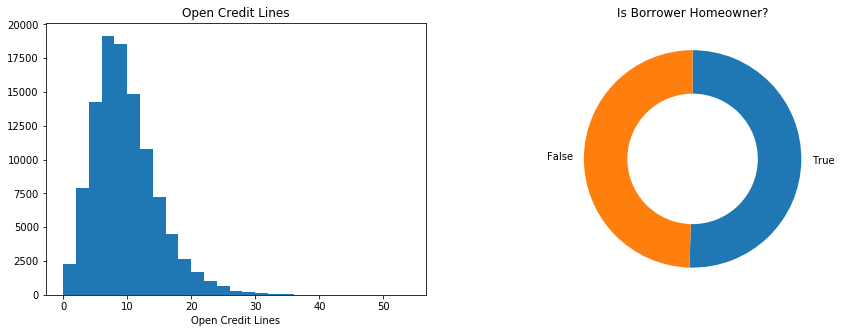

In [125]:
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1) 
bin_edges = np.arange(0, df['OpenCreditLines'].max()+2, 2)
plt.hist(data=df, x='OpenCreditLines',bins=bin_edges)
plt.title('Open Credit Lines')
plt.xlabel('Open Credit Lines');

plt.subplot(1, 2, 2)
sorted_counts = df['IsBorrowerHomeowner'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.title('Is Borrower Homeowner?');

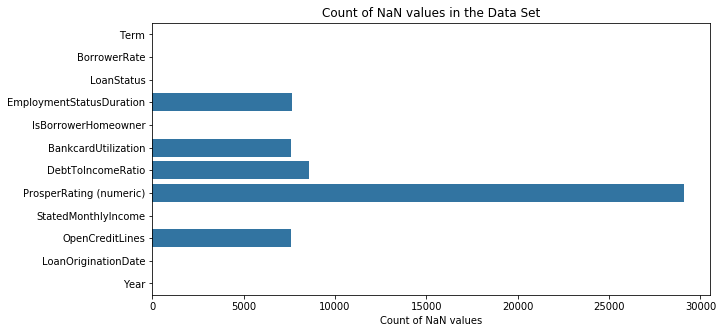

In [126]:
plt.figure(figsize = [10, 5]) 
na_counts=df.isna().sum()
sb.barplot(y=na_counts.index.values, x=na_counts, color=base_color)
plt.title('Count of NaN values in the Data Set')
plt.xlabel('Count of NaN values');

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

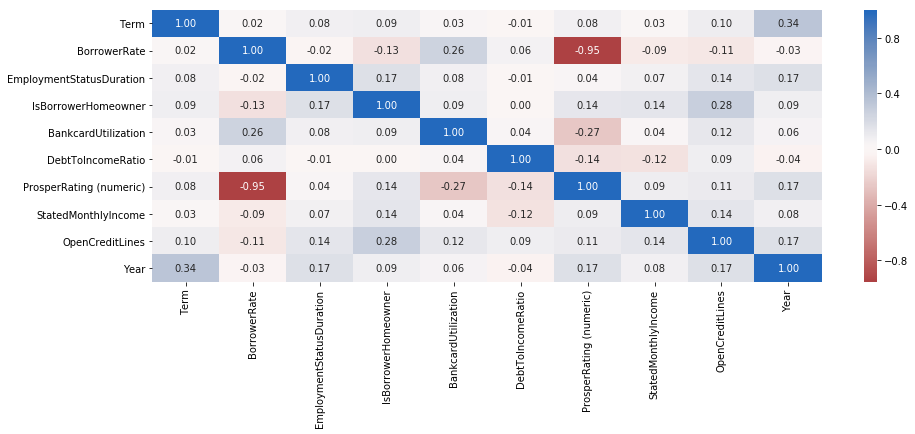

In [172]:
plt.figure(figsize = [15, 5]) 
sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

## How loan characteristics changed through the years

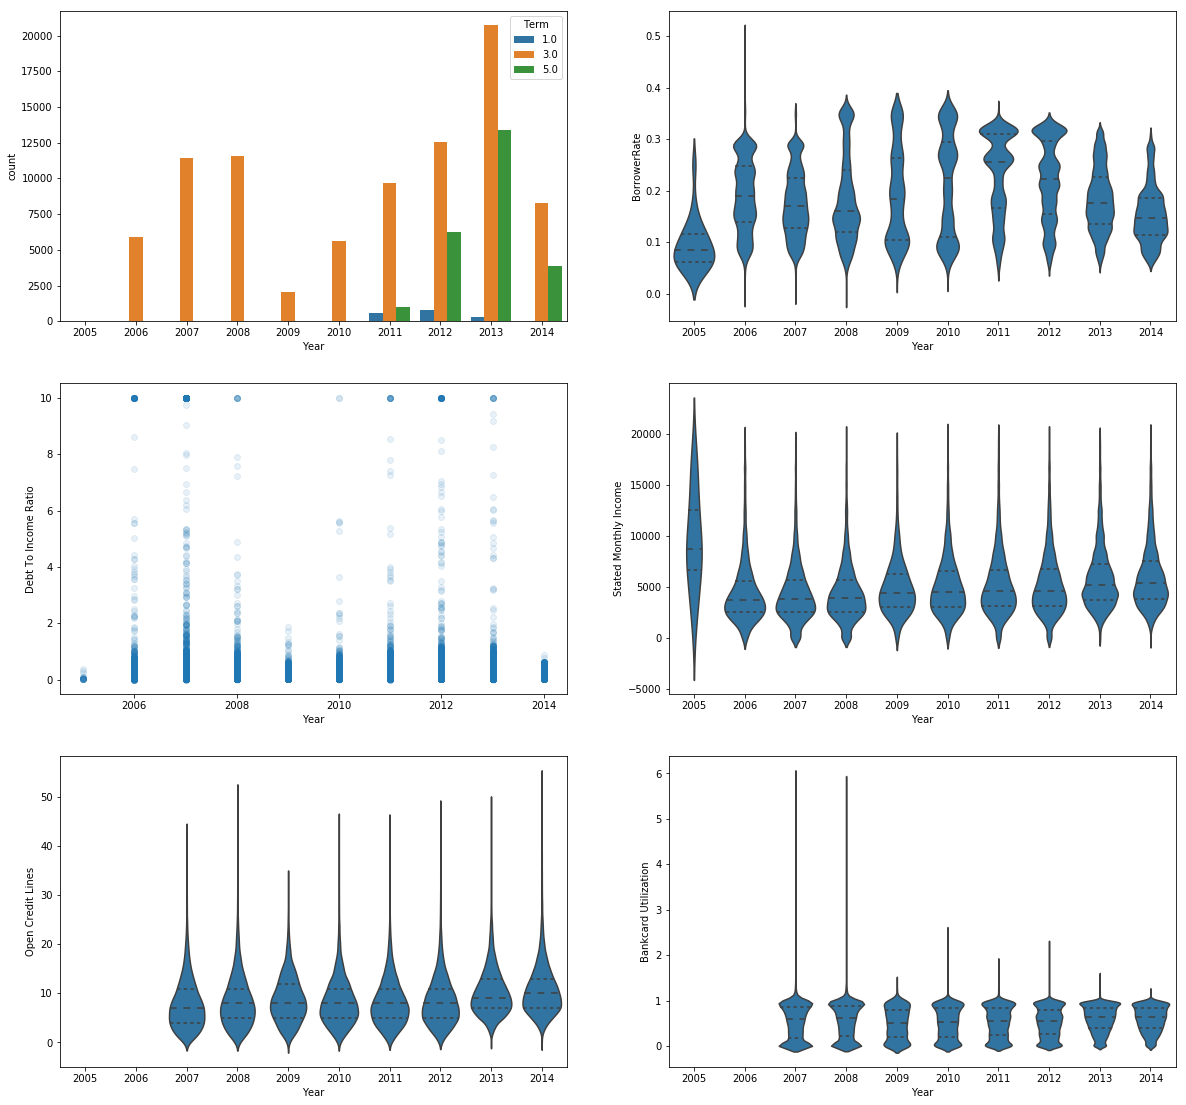

In [129]:
plt.figure(figsize = [20, 40]) 
base_color = sb.color_palette()[0]

plt.subplot(6, 2, 1) 
sb.countplot(data = df, x = 'Year', hue = 'Term');

plt.subplot(6, 2, 2) 
sb.violinplot(data = df, x = 'Year', y = 'BorrowerRate', color = base_color,  inner = 'quartile');

plt.subplot(6, 2, 3) 
plt.scatter(data = df, x = 'Year', y = 'DebtToIncomeRatio', alpha=0.1)
plt.title ('')
plt.xlabel('Year')
plt.ylabel('Debt To Income Ratio');

plt.subplot(6, 2, 4) 
df_scatter=df.query('StatedMonthlyIncome<20000')
sb.violinplot(data = df_scatter, x = 'Year', y = 'StatedMonthlyIncome', color = base_color,  inner = 'quartile',alpha=0.1)
plt.title ('')
plt.xlabel('Year')
plt.ylabel('Stated Monthly Income');

plt.subplot(6, 2, 5) 
sb.violinplot(data = df, x = 'Year', y = 'OpenCreditLines', color = base_color,  inner = 'quartile', alpha=0.1)
plt.title ('')
plt.xlabel('Year')
plt.ylabel('Open Credit Lines');

plt.subplot(6, 2, 6) 
sb.violinplot(data = df, x = 'Year', y = 'BankcardUtilization', color = base_color,  inner = 'quartile', alpha=0.1)
plt.title ('')
plt.xlabel('Year')
plt.ylabel('Bankcard Utilization');

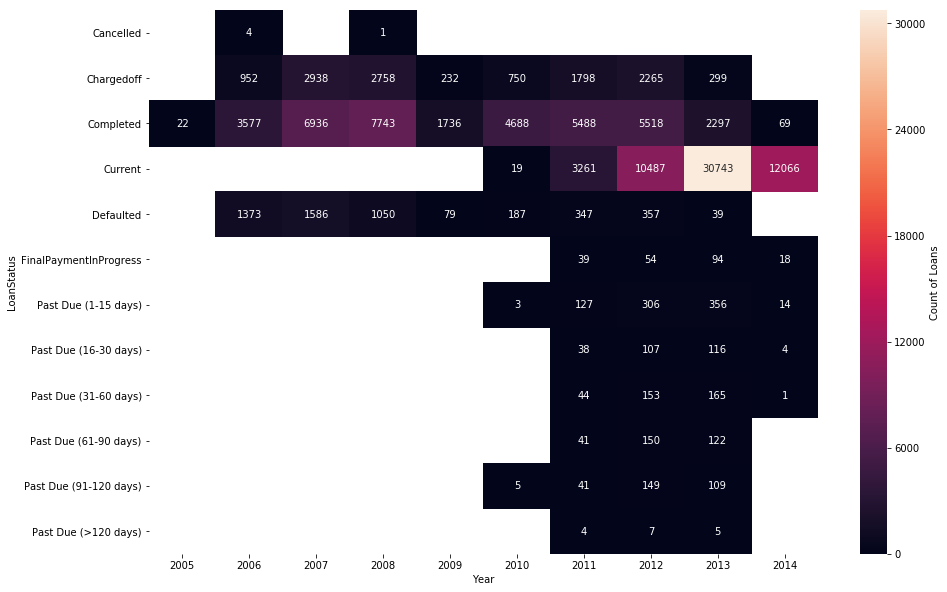

In [179]:
plt.figure(figsize = [15, 10]) 
df_set = df.groupby(['LoanStatus', 'Year']).count()['Term']
df_set = df_set.reset_index(name = 'Number')
df_set = df_set.pivot(index = 'LoanStatus', columns = 'Year',
                            values = 'Number')
sb.heatmap(df_set, annot = True, fmt = '.0f',
           cbar_kws = {'label' : 'Count of Loans'});

## What are the characteristics of the borrowers? 

### From the Income point of view

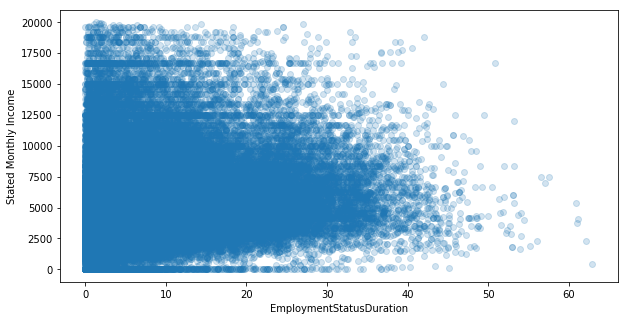

In [130]:
plt.figure(figsize = [10, 5]) 
plt.scatter(data = df_scatter, x = 'EmploymentStatusDuration', y = 'StatedMonthlyIncome', alpha=0.2)
plt.title ('')
plt.xlabel('EmploymentStatusDuration')
plt.ylabel('Stated Monthly Income');


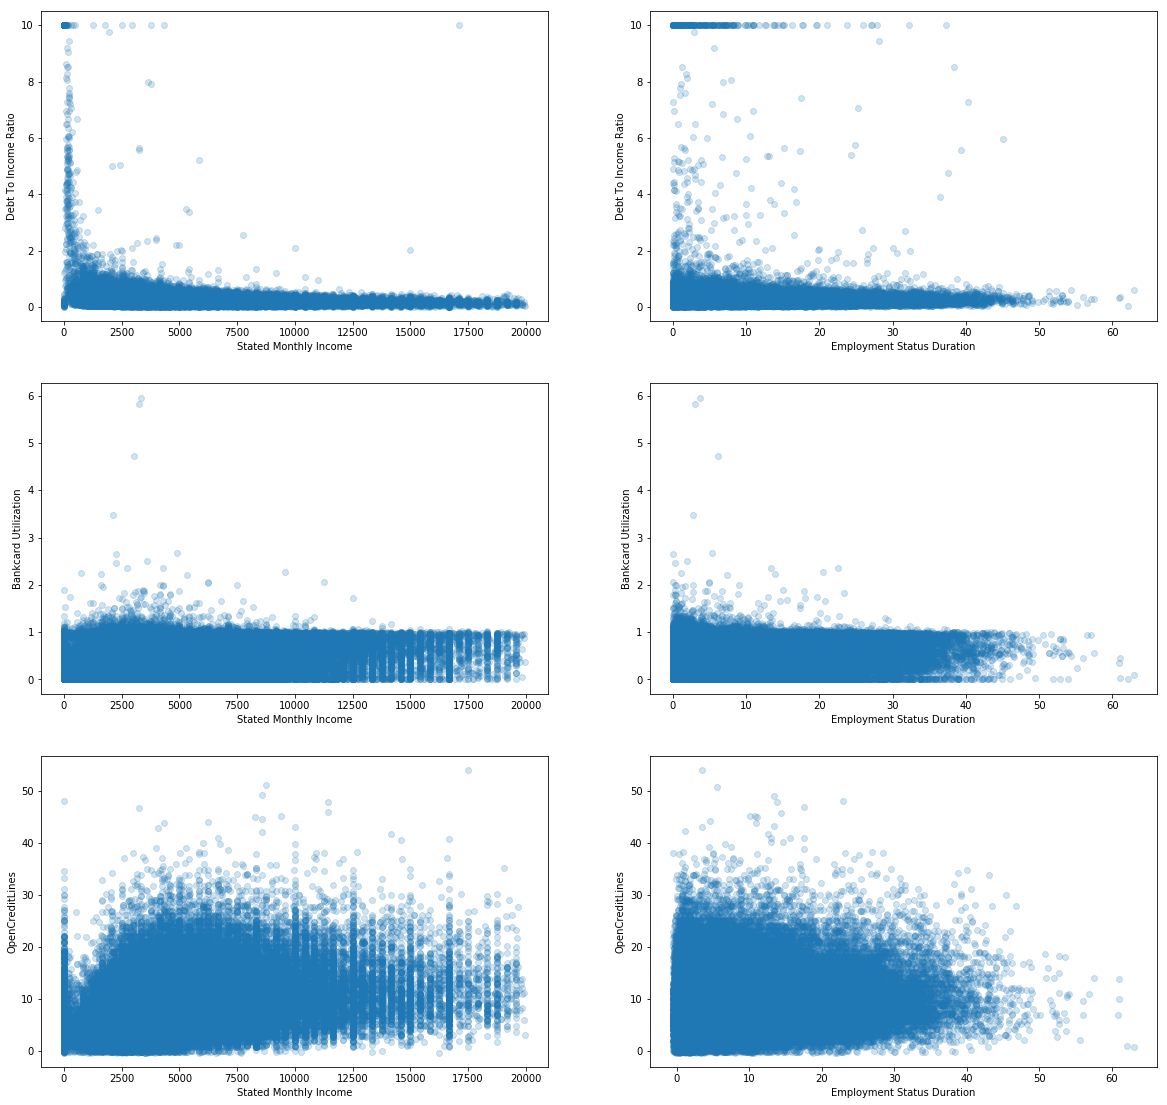

In [131]:
df_scatter=df.query('StatedMonthlyIncome<20000')

plt.figure(figsize = [20, 40]) 


plt.subplot(6, 2, 1) 
plt.scatter(data = df_scatter, x = 'StatedMonthlyIncome', y = 'DebtToIncomeRatio', alpha=0.2)
plt.title ('')
plt.xlabel('Stated Monthly Income')
plt.ylabel('Debt To Income Ratio');

plt.subplot(6, 2, 2) 
plt.scatter(data = df_scatter, x = 'EmploymentStatusDuration', y = 'DebtToIncomeRatio', alpha=0.2)
plt.title ('')
plt.xlabel('Employment Status Duration')
plt.ylabel('Debt To Income Ratio');


plt.subplot(6, 2, 3) 
plt.scatter(data = df_scatter, x = 'StatedMonthlyIncome', y = 'BankcardUtilization',  alpha=0.2)
plt.title ('')
plt.xlabel('Stated Monthly Income')
plt.ylabel('Bankcard Utilization');

plt.subplot(6, 2, 4) 
plt.scatter(data = df_scatter, x = 'EmploymentStatusDuration', y = 'BankcardUtilization',  alpha=0.2)
plt.title ('')
plt.xlabel('Employment Status Duration')
plt.ylabel('Bankcard Utilization');


plt.subplot(6, 2, 5) 
sb.regplot(data = df_scatter, x = 'StatedMonthlyIncome', y = 'OpenCreditLines', fit_reg = False,
           x_jitter = 0.6, y_jitter = 0.3, scatter_kws = {'alpha' : 1/5});
plt.title ('')
plt.xlabel('Stated Monthly Income')
plt.ylabel('OpenCreditLines');

plt.subplot(6, 2, 6) 
sb.regplot(data = df_scatter, x = 'EmploymentStatusDuration', y = 'OpenCreditLines', fit_reg = False,
           x_jitter = 0.6, y_jitter = 0.3, scatter_kws = {'alpha' : 1/5});
plt.title ('')
plt.xlabel('Employment Status Duration')
plt.ylabel('OpenCreditLines');



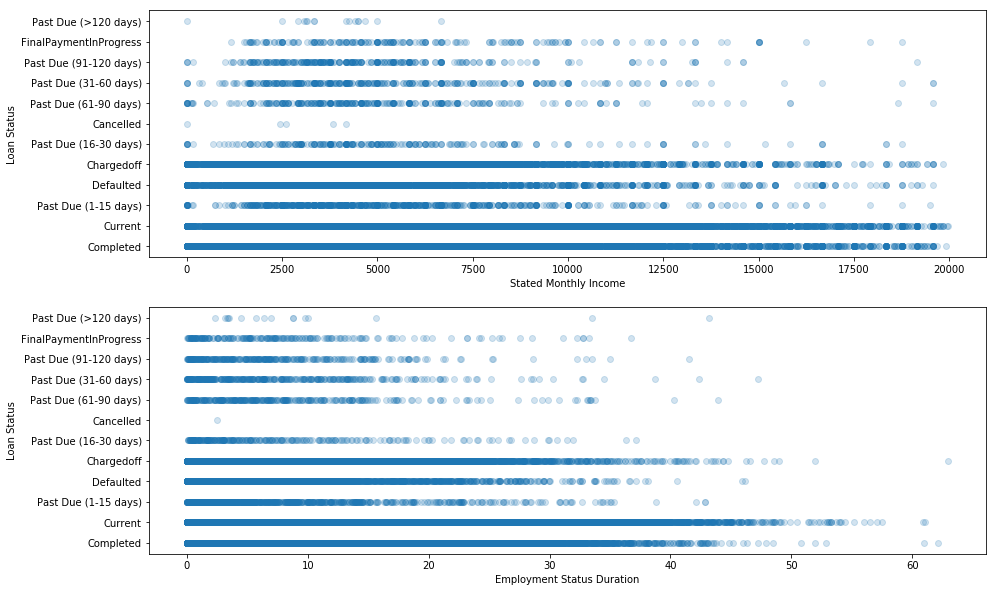

In [132]:
plt.figure(figsize = [15, 10]) 

plt.subplot(2, 1, 1) 
plt.scatter(data = df_scatter, x = 'StatedMonthlyIncome', y = 'LoanStatus',  alpha=0.2)
plt.title ('')
plt.xlabel('Stated Monthly Income')
plt.ylabel('Loan Status');

plt.subplot(2, 1, 2) 
plt.scatter(data = df_scatter, x = 'EmploymentStatusDuration', y = 'LoanStatus',  alpha=0.2)
plt.title ('')
plt.xlabel('Employment Status Duration')
plt.ylabel('Loan Status');

### Reverse engineering: Compare Loan characteristics with the Rating

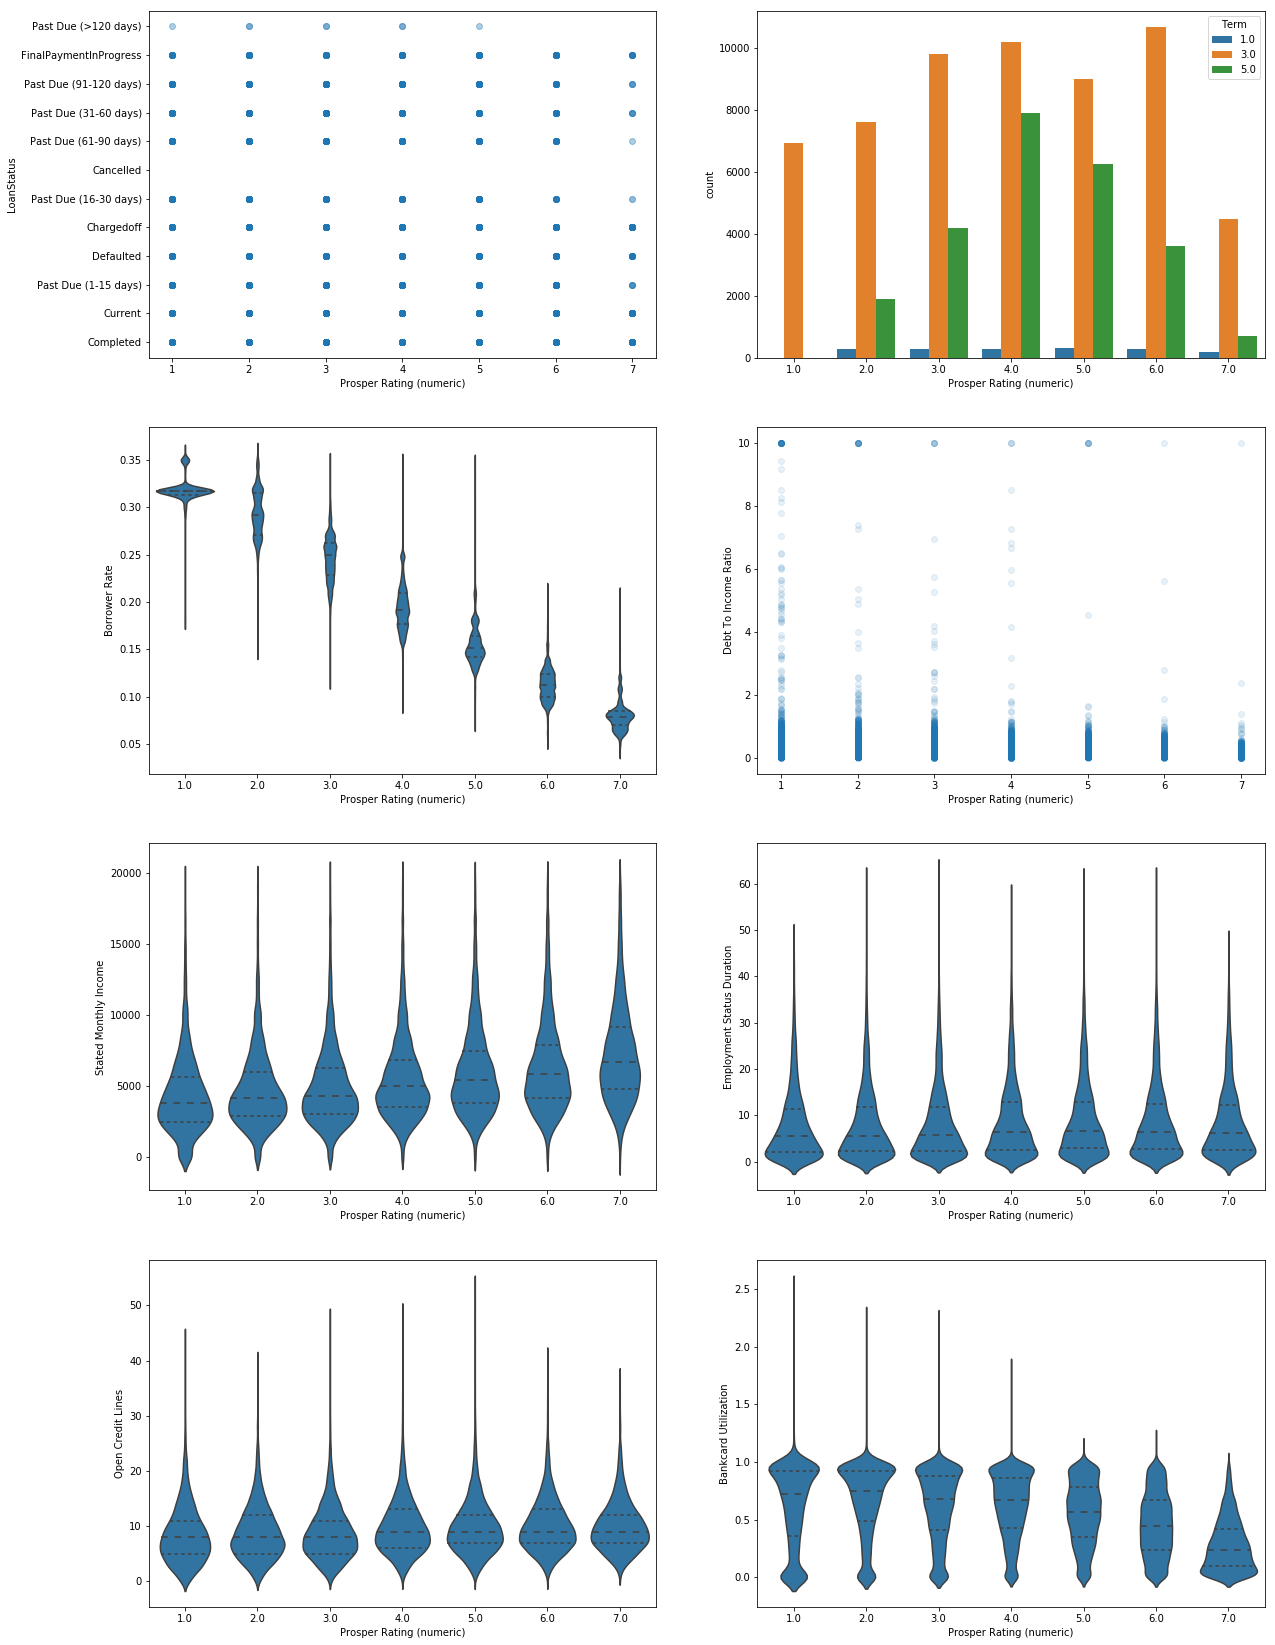

In [142]:
plt.figure(figsize = [20, 60]) 
base_color = sb.color_palette()[0]

plt.subplot(8, 2, 1)
plt.scatter(data = df_scatter, y = 'LoanStatus', x = 'ProsperRating (numeric)', alpha=0.2)
plt.title ('')
plt.xlabel('Prosper Rating (numeric)')
plt.ylabel('LoanStatus');

plt.subplot(8, 2, 2) 
sb.countplot(data = df, x = 'ProsperRating (numeric)', hue = 'Term');
plt.title ('')
plt.xlabel('Prosper Rating (numeric)');

plt.subplot(8, 2, 3) 
sb.violinplot(data = df, x = 'ProsperRating (numeric)', y = 'BorrowerRate', color = base_color,  inner = 'quartile')
plt.title ('')
plt.xlabel('Prosper Rating (numeric)')
plt.ylabel('Borrower Rate');

plt.subplot(8, 2, 4) 
plt.scatter(data = df, x = 'ProsperRating (numeric)', y = 'DebtToIncomeRatio', alpha=0.1)
plt.title ('')
plt.xlabel('Prosper Rating (numeric)')
plt.ylabel('Debt To Income Ratio');

plt.subplot(8, 2, 5) 
df_scatter=df.query('StatedMonthlyIncome<20000')
sb.violinplot(data = df_scatter, x = 'ProsperRating (numeric)', y = 'StatedMonthlyIncome', color = base_color,  inner = 'quartile',alpha=0.1)
plt.title ('')
plt.xlabel('Prosper Rating (numeric)')
plt.ylabel('Stated Monthly Income');

plt.subplot(8, 2, 6) 
sb.violinplot(data = df, x = 'ProsperRating (numeric)', y = 'EmploymentStatusDuration', color = base_color,  inner = 'quartile', alpha=0.1)
plt.title ('')
plt.xlabel('Prosper Rating (numeric)')
plt.ylabel('Employment Status Duration');

plt.subplot(8, 2, 7) 
sb.violinplot(data = df, x = 'ProsperRating (numeric)', y = 'OpenCreditLines', color = base_color,  inner = 'quartile', alpha=0.1)
plt.title ('')
plt.xlabel('Prosper Rating (numeric)')
plt.ylabel('Open Credit Lines');

plt.subplot(8, 2, 8) 
sb.violinplot(data = df, x = 'ProsperRating (numeric)', y = 'BankcardUtilization', color = base_color,  inner = 'quartile', alpha=0.1)
plt.title ('')
plt.xlabel('Prosper Rating (numeric)')
plt.ylabel('Bankcard Utilization');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

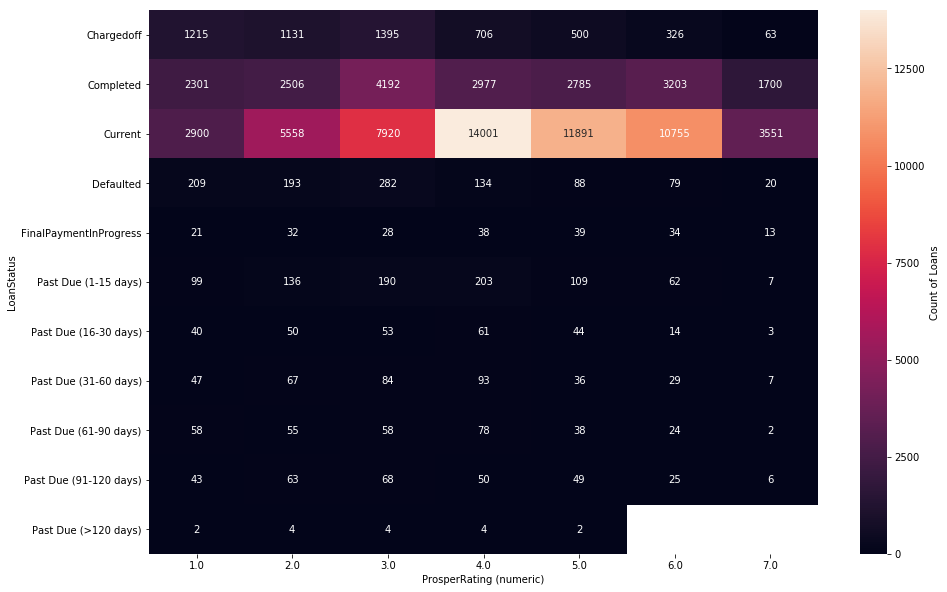

In [178]:
plt.figure(figsize = [15, 10]) 
df_set = df.groupby(['LoanStatus', 'ProsperRating (numeric)']).count()['Term']
df_set = df_set.reset_index(name = 'Number')
df_set = df_set.pivot(index = 'LoanStatus', columns = 'ProsperRating (numeric)',
                            values = 'Number')
sb.heatmap(df_set, annot = True, fmt = '.0f',
           cbar_kws = {'label' : 'Count of Loans'});

In [ ]:
plt.figure(figsize = [10, 5]) 
plt.scatter(data = df_scatter, x = 'EmploymentStatusDuration', y = 'StatedMonthlyIncome', alpha=0.2)
plt.title ('')
plt.xlabel('EmploymentStatusDuration')
plt.ylabel('Stated Monthly Income');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!